# Inputs
- flights_nulls removed.csv
- passengers_cleaned.csv
- fuel_cleaned.csv

## Task 10: Test Hypothesis: Higher delays tend to have higher fuel consumption per passenger

**Note**: fuel cons is around 3-4 liters per passenger per 100km in the industry

In [1]:
import pandas as pd
import numpy as np

## Step 1: get the number of passengers and total distance monthly per carrier
### Step 1.1 Find if flights transporting freight and mail are operating under the same companies and flights transporting passengers
### Step 1.2 Find out number of passengers that were carried (monthly) by different air carriers
### Step 1.3 Find out distance covered monthly by different air carriers  
This information is found in the passengers DB

In [2]:
# passengers DB
passengers = pd.read_csv('passengers_cleaned.csv', index_col = 0)

C:\Users\derob\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350494 entries, 0 to 2350496
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

In [4]:
# get date range
print(f'The passengers DB is containing data from {min(passengers.year)} to {max(passengers.year)}')

The passengers DB is containing data from 2015 to 2019


In [5]:
# keep only 2018 and 2019 (flights database only has data from 2018 to 2019)
db_passengers = passengers[passengers.year >= 2018]
print(len(db_passengers))

961571


### Step 1.1

In [6]:
# get idea of freight and mail weight compared to payload
db_passengers[['payload', 'freight', 'mail']].describe()

,payload,freight,mail
count,9.615710e+05,9.615710e+05,9.615710e+05
mean,8.727807e+05,1.063658e+05,2.902887e+03
std,1.541638e+06,5.417455e+05,2.780174e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.147000e+04,0.000000e+00,0.000000e+00
50%,2.672880e+05,0.000000e+00,0.000000e+00
75%,1.073554e+06,3.465000e+03,0.000000e+00
max,4.723840e+07,4.329936e+07,8.163150e+06


In [7]:
# find number of data points corresponding to flights containing only passengers, freight or mail, or combinations of the three

print(f'Only passengers {len(db_passengers[(db_passengers.passengers > 0) & (db_passengers.freight == 0) & (db_passengers.mail == 0)])}')
print(f'Only mail {len(db_passengers[(db_passengers.passengers == 0) & (db_passengers.freight == 0) & (db_passengers.mail > 0)])}')
print(f'Only freight {len(db_passengers[(db_passengers.passengers == 0) & (db_passengers.freight > 0) & (db_passengers.mail == 0)])}')
print(f'Passengers and mail {len(db_passengers[(db_passengers.passengers > 0) & (db_passengers.freight == 0) & (db_passengers.mail > 0)])}')
print(f'Only passengers and freight {len(db_passengers[(db_passengers.passengers > 0) & (db_passengers.freight > 0) & (db_passengers.mail == 0)])}')
print(f'Only mail and freight {len(db_passengers[(db_passengers.passengers == 0) & (db_passengers.freight > 0) & (db_passengers.mail > 0)])}')
print(f'Passengers, freight and mail {len(db_passengers[(db_passengers.passengers > 0) & (db_passengers.freight > 0) & (db_passengers.mail > 0)])}')
print(f'None of them {len(db_passengers[(db_passengers.passengers == 0) & (db_passengers.freight == 0) & (db_passengers.mail == 0)])}')

Only passengers 444145
Only mail 2591
Only freight 102014
Passengers and mail 18238
Only passengers and freight 207065
Only mail and freight 19435
Passengers, freight and mail 119851
None of them 48232


In [8]:
# drop data with none of them
print(len(db_passengers))
db_passengers = db_passengers[(db_passengers.passengers > 0) | (db_passengers.freight > 0) | (db_passengers.mail > 0)]
print(len(db_passengers))

961571
913339


In [9]:
# See if there are airlines specific to passenger flights

# Carrier list for flights containing only passengers
carrier_passengers = db_passengers[(db_passengers.passengers > 0) & (db_passengers.freight == 0) & (db_passengers.mail == 0)]['unique_carrier'].unique()

# Carrier list for everything other than exclusively passengers
carrier_other = db_passengers.drop(db_passengers[(db_passengers.passengers > 0) & (db_passengers.freight == 0) & (db_passengers.mail == 0)].index,axis=0)['unique_carrier'].unique()

# print carrier list that operate only passengers and no mail or freight
carrier_only_passengers = []
for carrier in carrier_passengers:
    if carrier not in carrier_other:
        carrier_only_passengers.append(carrier)
print(f" CARRIER LIST OPERATING EXCLUSIVELY PASSENGER FLIGHTS \n {carrier_only_passengers}")

 CARRIER LIST OPERATING EXCLUSIVELY PASSENGER FLIGHTS 
 ['IFQ', 'LV', '10Q', '15Q', '24Q', 'OR', 'PD', 'PY', 'QK', 'R0', 'SVW', 'TS', 'VR', '2UQ', 'WS', 'AX', 'G4', 'G7', 'GL', 'TR', 'BX', '3EQ', 'AN', '3SD', 'GEQ', '27Q', '4B', '3U', 'CAZ', '1UQ', '0UQ', 'CRV', '04Q', 'LXQ', '7C', '0CQ', '1XQ', '2KQ', 'HYP', 'WG', 'ZX', 'LJ', '12Q', '0J', '14Q', 'EQ', 'F9', 'B0', '02Q', 'G3', 'LS', '0WQ', '1AQ', '1EQ', '1WQ', '3M', 'BCQ', 'D8', '17Q', 'Q6', 'UP', 'VH', 'SEB', 'YR', 'BC', 'XP', 'WL', 'MW', '26Q', '0Q', '1ZQ', 'LDQ', '0BQ', '9V', 'JVQ', 'TEQ', 'WGT', '25Q', 'R3', '1HQ', 'KFQ', 'FP', 'FYQ', 'PP', '38Q', 'EAU', '07Q', 'LDM', '1LQ', 'NK', '2HQ', 'C5', '9X', 'OO', '3BQ', '3E', 'WST', 'AAT', '1QQ', 'A0', 'ZK', 'VW', 'VX', '30Q', 'PF', 'PBQ', '2JQ', '1PQ']


In [10]:
# filter the database with the list of carriers operating exclusively passenger flights
print(len(db_passengers))
db_passengers = db_passengers[db_passengers.unique_carrier.isin(carrier_only_passengers)]
print(len(db_passengers))

913339
186509


In [11]:
# get monthly number of passengers and total distance per carrier
db_passengers = pd.DataFrame(db_passengers.groupby(['unique_carrier', 'year', 'month'])[['passengers', 'distance']].sum())
db_passengers

passengers  distance
unique_carrier year month                      
02Q            2018 3            25.0    3339.0
                    4           119.0    8585.0
                    6            86.0   12138.0
               2019 2           552.0   11868.0
                    5           158.0   12035.0
...                               ...       ...
ZX             2019 8        116336.0   17420.0
                    9         78375.0   17420.0
                    10        56535.0   12970.0
                    11        24624.0    6436.0
                    12        19327.0    5260.0

[1749 rows x 2 columns]

## Step 2: Find out monthly total fuel comsumption per air carrier.
This information can be found in the fuels DB


In [12]:
#fuels db
fuel = pd.read_csv('fuel_cleaned.csv', index_col = 0)

In [13]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 1 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3025 non-null   int64  
 1   airline_id         3025 non-null   float64
 2   unique_carrier     3025 non-null   object 
 3   carrier            3025 non-null   object 
 4   carrier_name       3025 non-null   object 
 5   carrier_group_new  3025 non-null   int64  
 6   sdomt_gallons      3025 non-null   float64
 7   satl_gallons       3025 non-null   float64
 8   spac_gallons       3025 non-null   float64
 9   slat_gallons       3025 non-null   float64
 10  sint_gallons       3025 non-null   float64
 11  ts_gallons         3025 non-null   float64
 12  tdomt_gallons      3025 non-null   float64
 13  tint_gallons       3025 non-null   float64
 14  total_gallons      3025 non-null   float64
 15  sdomt_cost         3025 non-null   float64
 16  satl_cost          3025 

In [14]:
# see consumption features and confirm total_gallons is the sum
fuel[['tdomt_gallons', 'tint_gallons', 'total_gallons']]

,tdomt_gallons,tint_gallons,total_gallons
1,163052.0,47060.0,210112.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,284362.0,0.0,284362.0
5,32138000.0,28831000.0,60969000.0
...,...,...,...
3030,632636.0,1899102.0,2531738.0
3031,0.0,0.0,0.0
3032,0.0,0.0,0.0
3033,21048.0,0.0,21048.0


In [15]:
# get date range
print(f'The fuels DB is containing data from {min(fuel.year)} to {max(fuel.year)}')

The fuels DB is containing data from 2015 to 2019


In [16]:
# keep only 2018 and 2019 (flights database only has data from 2018 to 2019)
db_fuel = fuel[fuel.year >= 2018]

In [17]:
# get monthly consumption per carrier
db_fuel = pd.DataFrame(fuel.groupby(['unique_carrier', 'year', 'month'])['total_gallons'].sum())
db_fuel

total_gallons
unique_carrier year month               
09Q            2016 2           328697.0
                    3           551159.0
                    4           379161.0
                    5           318452.0
                    7           328601.0
...                                  ...
ZW             2017 8            11462.0
                    9            14821.0
                    10           12882.0
                    11           12089.0
                    12           43910.0

[3025 rows x 1 columns]

## Step 3: Find out monthly delay per air carrier 
This information can be found in flights DB

In [ ]:
# flights data
flights = pd.read_csv('flights_nullsremoved.csv')

In [ ]:
# extract month from fl_date feature
import datetime

flights['fl_date'] = pd.to_datetime(flights['fl_date'])
flights['month'] = pd.DatetimeIndex(flights['fl_date']).month
flights['year'] = pd.DatetimeIndex(flights['fl_date']).year

In [ ]:
# get date ranges
print(f"Minimum date {min(pd.to_datetime(flights.fl_date))} to {max(pd.to_datetime(flights.fl_date))}")
print(f'The flights DB is containing data from {min(flights.year)} to {max(flights.year)}')

**Trying code on a sample**

In [ ]:
flights_sample = flights[:1000]

In [ ]:
flights_sample = flights_sample.groupby(['op_unique_carrier', 'year', 'month'])['dep_delay'].sum()

In [23]:
flights_sample.head()

,,,dep_delay,arr_delay
op_unique_carrier,year,month,,
AA,2018,11,15337.0,15767.0
MQ,2018,11,5396.0,5492.0
OH,2018,11,2460.0,2311.0
PT,2018,11,5763.0,5737.0


In [24]:
flights_sample['monthly_delay'] = flights_sample['dep_delay']

In [25]:
flights_sample.head()

,,,dep_delay,arr_delay,monthly_delay
op_unique_carrier,year,month,,,
AA,2018,11,15337.0,15767.0,31104.0
MQ,2018,11,5396.0,5492.0,10888.0
OH,2018,11,2460.0,2311.0,4771.0
PT,2018,11,5763.0,5737.0,11500.0


**Running same code on flights db**

In [27]:
# get a db grouped per carrier & month
db_flights = flights.groupby(['op_unique_carrier', 'year', 'month'])['dep_delay'].sum()

# add a column monthly_delay, take only arr_delay
db_flights['monthly_delay'] = db_flights['arr_delay']

db_flights.head()

dep_delay  arr_delay  monthly_delay
op_unique_carrier year month                                     
9E                2018 1       204984.0    55151.0        55151.0
                       2       221215.0    84609.0        84609.0
                       3       167663.0    66252.0        66252.0
                       4       238726.0   137816.0       137816.0
                       5       176770.0    38926.0        38926.0

In [28]:
# rename unique_carrier column (it's actually op_unique_carrier)
db_flights.index.names = ['unique_carrier', 'year', 'month']

In [29]:
db_flights

dep_delay  arr_delay  monthly_delay
unique_carrier year month                                     
9E             2018 1       204984.0    55151.0        55151.0
                    2       221215.0    84609.0        84609.0
                    3       167663.0    66252.0        66252.0
                    4       238726.0   137816.0       137816.0
                    5       176770.0    38926.0        38926.0
...                              ...        ...            ...
ZW             2019 8       113329.0    78857.0        78857.0
                    9        94769.0    47397.0        47397.0
                    10       20075.0   -30286.0       -30286.0
                    11       92611.0    34008.0        34008.0
                    12       83745.0    28289.0        28289.0

[629 rows x 3 columns]

### Merge databases

In [30]:
# join the three databases. The output will contain only carriers doing exclusively passenger flights
data_merged = pd.merge(db_passengers, db_fuel, on=['unique_carrier', 'year', 'month'], how='inner')
data_merged = pd.merge(data_merged, db_flights, on=['unique_carrier', 'year', 'month'], how='inner')

In [31]:
print(len(db_passengers))
print(len(db_fuel))
print(len(db_flights))
print(len(data_merged))

1749
3025
629
105


In [32]:
data_merged

passengers   distance  total_gallons  dep_delay  \
unique_carrier year month                                                    
F9             2018 1       1521016.0   603433.0     22206391.0   151613.0   
                    2       1421476.0   627069.0     20163955.0   141639.0   
                    3       1610156.0   555965.0     21438371.0    98149.0   
                    4       1567522.0   920628.0     21089364.0   154746.0   
                    5       1729577.0  1044051.0     22315422.0   202203.0   
...                               ...        ...            ...        ...   
OO             2019 5       3739439.0  1155138.0      8838081.0   765697.0   
                    6       3849942.0  1373264.0      8915291.0  1104387.0   
                    7       3935300.0  1145859.0      9566241.0   994571.0   
                    8       3904017.0  1276194.0      8790766.0   800661.0   
                    9       3422387.0  1115123.0      8834786.0   555741.0   

                           arr_delay  monthly_delay  
unique_carrier year month                            
F9             2018 1        83151.0        83151.0  
                    2        90013.0        90013.0  
                    3        42332.0        42332.0  
                    4        94473.0        94473.0  
                    5       147623.0       147623.0  
...                              ...            ...  
OO             2019 5       417611.0       417611.0  
                    6       844528.0       844528.0  
                    7       672948.0       672948.0  
                    8       422672.0       422672.0  
                    9       155900.0       155900.0  

[105 rows x 6 columns]

In [33]:
# compute consumption (in gallons per mile and in liters per 100km) per passenger

#gallons per mile per passenger
data_merged['gallons_per_mile_per_passenger'] = (data_merged.total_gallons / data_merged.distance) / data_merged.passengers

#liters per 100km per passenger (more used and understandable)
data_merged['liters_per_100km_per_passenger'] = data_merged['gallons_per_mile_per_passenger'] * 100/(1.60934 * 0.264172)

In [34]:
# drop values where total_gallons is zero
data_merged = data_merged[data_merged.total_gallons > 0]
data_merged

passengers   distance  total_gallons  dep_delay  \
unique_carrier year month                                                    
F9             2018 1       1521016.0   603433.0     22206391.0   151613.0   
                    2       1421476.0   627069.0     20163955.0   141639.0   
                    3       1610156.0   555965.0     21438371.0    98149.0   
                    4       1567522.0   920628.0     21089364.0   154746.0   
                    5       1729577.0  1044051.0     22315422.0   202203.0   
...                               ...        ...            ...        ...   
OO             2019 5       3739439.0  1155138.0      8838081.0   765697.0   
                    6       3849942.0  1373264.0      8915291.0  1104387.0   
                    7       3935300.0  1145859.0      9566241.0   994571.0   
                    8       3904017.0  1276194.0      8790766.0   800661.0   
                    9       3422387.0  1115123.0      8834786.0   555741.0   

                           arr_delay  monthly_delay  \
unique_carrier year month                             
F9             2018 1        83151.0        83151.0   
                    2        90013.0        90013.0   
                    3        42332.0        42332.0   
                    4        94473.0        94473.0   
                    5       147623.0       147623.0   
...                              ...            ...   
OO             2019 5       417611.0       417611.0   
                    6       844528.0       844528.0   
                    7       672948.0       672948.0   
                    8       422672.0       422672.0   
                    9       155900.0       155900.0   

                           gallons_per_mile_per_passenger  \
unique_carrier year month                                   
F9             2018 1                            0.000024   
                    2                            0.000023   
                    3                            0.000024   
                    4                            0.000015   
                    5                            0.000012   
...                                                   ...   
OO             2019 5                            0.000002   
                    6                            0.000002   
                    7                            0.000002   
                    8                            0.000002   
                    9                            0.000002   

                           liters_per_100km_per_passenger  
unique_carrier year month                                  
F9             2018 1                            0.005691  
                    2                            0.005321  
                    3                            0.005633  
                    4                            0.003437  
                    5                            0.002907  
...                                                   ...  
OO             2019 5                            0.000481  
                    6                            0.000397  
                    7                            0.000499  
                    8                            0.000415  
                    9                            0.000545  

[84 rows x 8 columns]

In [35]:
# the liters_per_100km_per_passenger measure is supposed to be around 3-4 liters. Seems to be an issue here somewhere

## Plot the results

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Consumptions per flight delays')

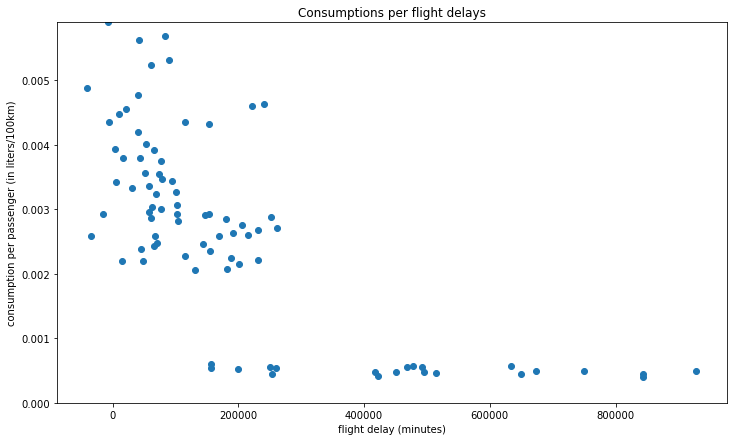

In [37]:
# plot
plt.figure(figsize=(12,7))
plt.scatter(data_merged.monthly_delay, data_merged.liters_per_100km_per_passenger)
plt.ylim(0, max(data_merged.liters_per_100km_per_passenger))
plt.ylabel('consumption per passenger (in liters/100km)')
plt.xlabel('flight delay (minutes)')
plt.title('Consumptions per flight delays')

Conclusion: it doesn't look like the consumption per passenger is related to flight delay. There seem to be two different distributions concerning fuel consumption:
1. A constant fuel consuption around 0.0005
2. A cluster of variations around 0.002 and 0.005
This could be related to flights that are more empty than others and would lead up to a higher fuel consumption per passenger. 
Let's confirm this by removing the passengers input and looking at only fuel consumption per distance unit.

In [38]:
# export merged_db
data_merged.to_csv('EDA_Task10_data.csv')

# Check hypothesis: Do higher delays tend to have a higher fuel consumption per mile? (include freight and mail)
Compare consumption in gallons per mile and see if there is a relation with delays

In [39]:
# re - do a passengers DB keeping all carriers

db_passengers2 = passengers[passengers.year >= 2018]
db_passengers2 = pd.DataFrame(db_passengers2.groupby(['unique_carrier', 'year', 'month'])[['passengers', 'distance']].sum())

In [40]:
# join the databases
# join the three databases
data_merged2 = pd.merge(db_passengers2, db_fuel, on=['unique_carrier', 'year', 'month'], how='inner')
data_merged2 = pd.merge(data_merged2, db_flights, on=['unique_carrier', 'year', 'month'], how='inner')

In [41]:
print(len(db_passengers2))
print(len(db_fuel))
print(len(db_flights))
print(len(data_merged2))

6799
3025
629
419


In [42]:
# compute fuel cons

data_merged2['cons_per_mile'] = data_merged2.total_gallons / data_merged2.distance

# drop values where total_gallons is zero
data_merged2 = data_merged2[data_merged2.total_gallons > 0]

data_merged2

passengers   distance  total_gallons  dep_delay  \
unique_carrier year month                                                    
AA             2018 1      11296526.0  3015630.0    283974071.0   494784.0   
                    2      10745382.0  2896942.0    261946387.0   495890.0   
                    3      12888804.0  2989934.0    298906244.0   470556.0   
                    4      12276405.0  3213436.0    297784292.0   489369.0   
                    5      12949638.0  3206234.0    318954880.0   864674.0   
...                               ...        ...            ...        ...   
YX             2019 5       1626991.0   661909.0        18888.0   245194.0   
                    6       1709879.0   831004.0        18137.0   380891.0   
                    7       1673169.0   740277.0        27361.0   311431.0   
                    8       1680699.0   837487.0        22245.0   340969.0   
                    9       1506420.0   609329.0        22895.0    75054.0   

                           arr_delay  monthly_delay  cons_per_mile  
unique_carrier year month                                           
AA             2018 1        30903.0        30903.0      94.167411  
                    2       135375.0       135375.0      90.421688  
                    3       -16166.0       -16166.0      99.970850  
                    4        38006.0        38006.0      92.668499  
                    5       456674.0       456674.0      99.479601  
...                              ...            ...            ...  
YX             2019 5       146565.0       146565.0       0.028536  
                    6       312039.0       312039.0       0.021825  
                    7       206056.0       206056.0       0.036960  
                    8       261211.0       261211.0       0.026562  
                    9       -61984.0       -61984.0       0.037574  

[252 rows x 7 columns]

Text(0.5, 1.0, 'Consumptions per flight delays')

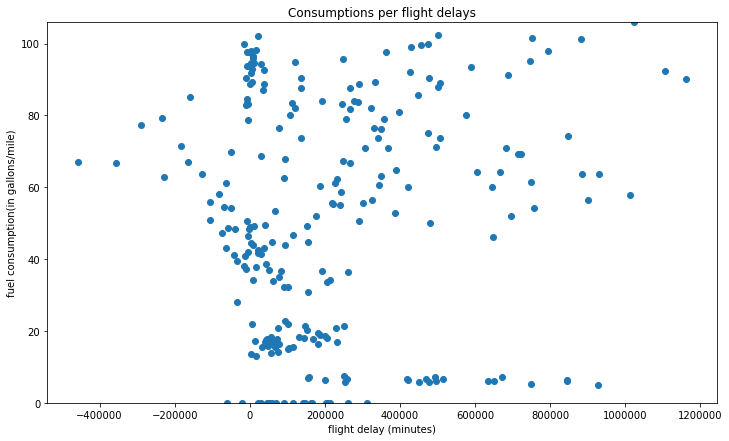

In [43]:
plt.figure(figsize=(12,7))
plt.scatter(data_merged2.monthly_delay, data_merged2.cons_per_mile)
plt.ylim(0, max(data_merged2.cons_per_mile))
plt.ylabel('fuel consumption(in gallons/mile)')
plt.xlabel('flight delay (minutes)')
plt.title('Consumptions per flight delays')

# Conclusion

By looking at this second graph, it seemd like there are three groups:
1. A group of fuel consumptions extremely low - might be an issue with the data - we won,t consider them
2. Part of the data is forming a line at 3 gallons per mile of fuel consuption, that has no impact with the flight delay
3. The majority of the data is showing high variance and there seems to be higher fuel consuption when delays are higher, especially with longer delays.